# Estadística descriptiva

Es una rama que busca hacer analisis en la información dada, con el objetivo de resumir y entender el comportamiento de los datos

## Flujo de trabajo de data science

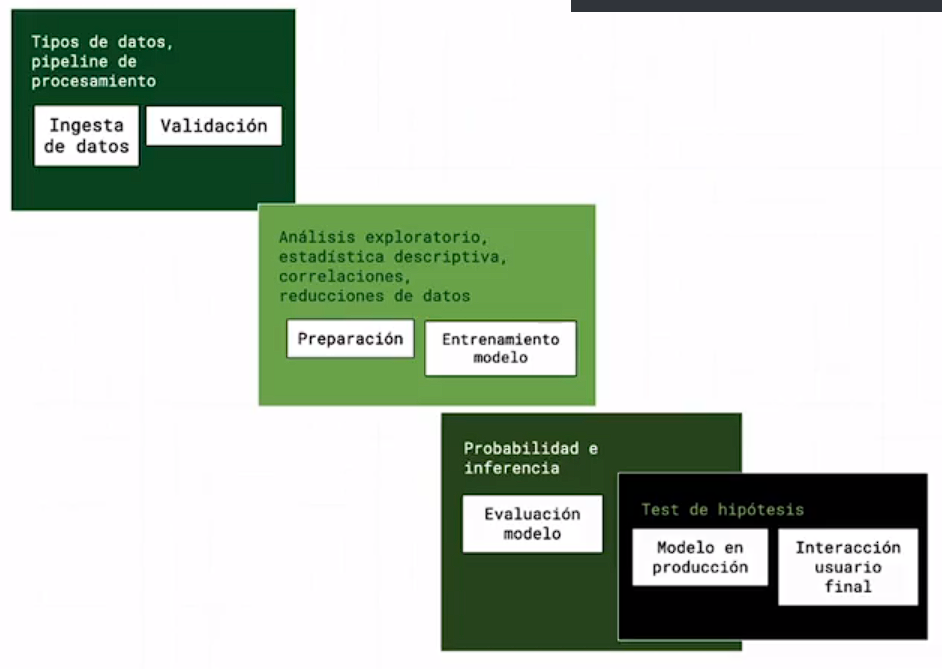

- Data ingestion

- Data visualization

- Data preparation

- Model training

- Model evaluation

- Model validation

- Model serving

- End user interface

## Estadísticos para analítica y exploración

### [Tipos de datos](./3.%20Funciones%20matemáticas%20para%20Data%20Science.ipynb)

- Categóricos:
    - Ordinal
    - Nominal

- Numéricos
    - Discretos
    - Continuos

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
data = pd.read_csv("./data/cars.csv")
data

manufacturer_name  model_name transmission   color  odometer_value  \
0                Subaru     Outback    automatic  silver          190000   
1                Subaru     Outback    automatic    blue          290000   
2                Subaru    Forester    automatic     red          402000   
3                Subaru     Impreza   mechanical    blue           10000   
4                Subaru      Legacy    automatic   black          280000   
...                 ...         ...          ...     ...             ...   
38526          Chrysler         300    automatic  silver          290000   
38527          Chrysler  PT Cruiser   mechanical    blue          321000   
38528          Chrysler         300    automatic    blue          777957   
38529          Chrysler  PT Cruiser   mechanical   black           20000   
38530          Chrysler     Voyager    automatic  silver          297729   

       year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0               2010    gasoline           False    gasoline              2.5   
1               2002    gasoline           False    gasoline              3.0   
2               2001    gasoline           False    gasoline              2.5   
3               1999    gasoline           False    gasoline              3.0   
4               2001    gasoline           False    gasoline              2.5   
...              ...         ...             ...         ...              ...   
38526           2000    gasoline           False    gasoline              3.5   
38527           2004      diesel           False      diesel              2.2   
38528           2000    gasoline           False    gasoline              3.5   
38529           2001    gasoline           False    gasoline              2.0   
38530           2000    gasoline           False    gasoline              2.4   

       ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0      ...      True       True      True     False       True      False   
1      ...      True      False     False      True       True      False   
2      ...      True      False     False     False      False      False   
3      ...     False      False     False     False      False      False   
4      ...      True      False      True      True      False      False   
...    ...       ...        ...       ...       ...        ...        ...   
38526  ...      True      False     False      True       True      False   
38527  ...      True      False     False      True       True      False   
38528  ...      True      False     False      True       True      False   
38529  ...      True      False     False     False      False      False   
38530  ...     False      False     False     False      False      False   

      feature_7  feature_8  feature_9  duration_listed  
0          True       True       True               16  
1         False      False       True               83  
2         False       True       True              151  
3         False      False      False               86  
4         False      False       True                7  
...         ...        ...        ...              ...  
38526     False       True       True              301  
38527     False       True       True              317  
38528     False       True       True              369  
38529     False      False       True              490  
38530     False      False       True              632  

[38531 rows x 30 columns]

In [27]:
data.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [28]:
data.describe()

odometer_value  year_produced  engine_capacity     price_usd  \
count    38531.000000   38531.000000     38521.000000  38531.000000   
mean    248864.638447    2002.943734         2.055161   6639.971021   
std     136072.376530       8.065731         0.671178   6428.152018   
min          0.000000    1942.000000         0.200000      1.000000   
25%     158000.000000    1998.000000         1.600000   2100.000000   
50%     250000.000000    2003.000000         2.000000   4800.000000   
75%     325000.000000    2009.000000         2.300000   8990.000000   
max    1000000.000000    2019.000000         8.000000  50000.000000   

       number_of_photos    up_counter  duration_listed  
count      38531.000000  38531.000000     38531.000000  
mean           9.649062     16.306091        80.577249  
std            6.093217     43.286933       112.826569  
min            1.000000      1.000000         0.000000  
25%            5.000000      2.000000        23.000000  
50%            8.000000      5.000000        59.000000  
75%           12.000000     16.000000        91.000000  
max           86.000000   1861.000000      2232.000000

### Medidas de tendencia central

Son medidas que nos ayudan a resumir una gran cantidad de información en un solo numero

- Media: Es el promedio de todos los datos, puede ser susceptible a valores atípicos.

$$\bar{x}=\mu=\frac{\sum_{i=1}^{N}{x_i}}{N}$$

- Mediana: Es el dato central es decir tiene la misma cantidad de datos a su izquierda y derecha.

Cuando N es par:
$$Me=\frac{n+1}{2}$$

Cuando N es impar:
$$Me=\frac{x\frac{n}{2}+x\frac{n}{2}+1}{2}$$

- Moda: Es el dato que mas se repite, la moda no aplica para datos numéricos continuos.

$$max(Freq(x_i))$$

- Diagrama de frecuencia
Es la representación grafica asociada a la tabla de frecuencia, normalmente todos los estadísticos descriptivos se pueden representar en términos de esta distribución

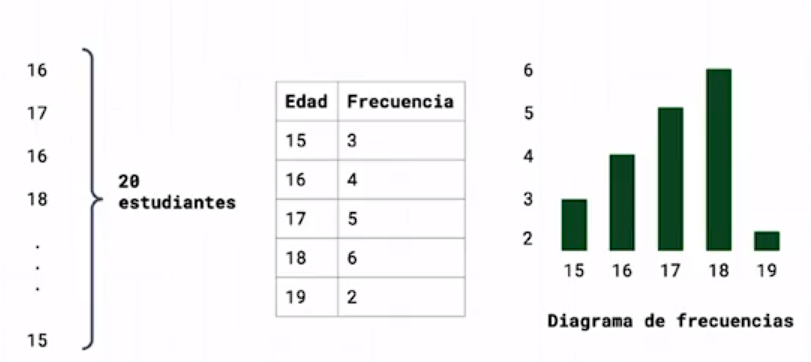

In [29]:
data["price_usd"].mean()

6639.971021255613

In [30]:
data["price_usd"].median()

4800.0

Con los diagramas de frecuencia, como lo es un histograma, se pueden observar si hay datos atipico

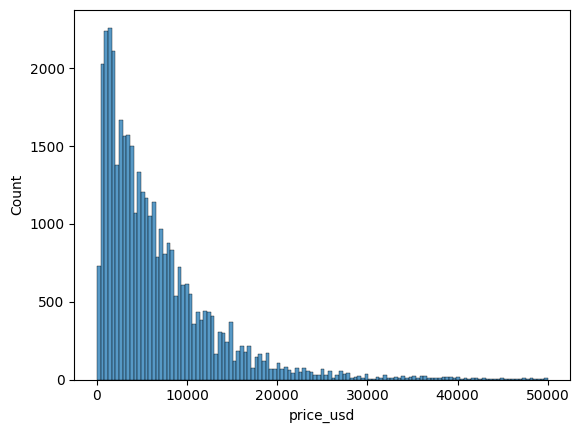

In [31]:
sns.histplot(data, x="price_usd")
plt.show()

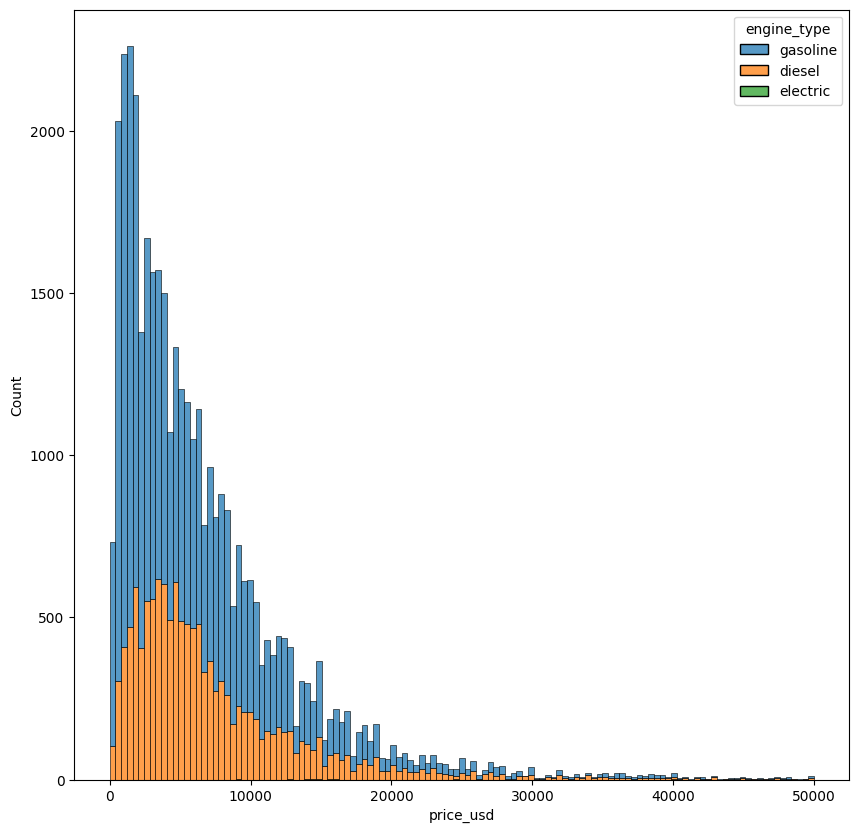

In [32]:
plt.figure(figsize=(10,10))
sns.histplot(data, x="price_usd", hue="engine_type", multiple="stack")
plt.show()

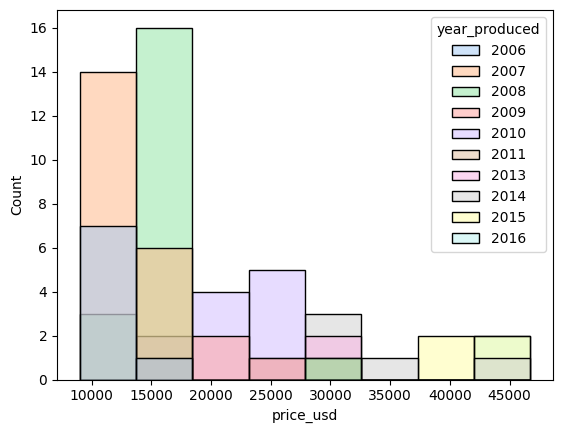

In [33]:
Q7_data = data[(data["manufacturer_name"]=="Audi") & (data["model_name"]=="Q7")]
sns.histplot(Q7_data, x="price_usd", hue="year_produced", multiple="layer", palette="pastel")
plt.show()

In [34]:
px.histogram(data, "price_usd", color="engine_type", 
             barmode="overlay")

### Medidas de dispersión

Las medidas de tendencia, como lo es la media, no detecta correctamente los valores atípicos, por lo que solo con este dato no es posible detectar de donde a donde van los datos y que tan lejos están unos de otros. Para eso son las medidas de dispersión como:

- Rango: Es el intervalo entre el valor máximo y el valor mínimo.

- Cuartiles

- Desviación estandar: Indica qué tan dispersos están los datos con respecto a la media

Varianza = $\sigma^2=\frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2$

Desviación estándar = $\sigma$

In [35]:
data["price_usd"].std()

6428.1520182029035

In [36]:
data["price_usd"].max() - data["price_usd"].min()

49999.0

In [37]:
for i in range(4):
    print(f"Q{1+i}: {data['price_usd'].quantile(0.25*(i + 1))}")

Q1: 2100.0
Q2: 4800.0
Q3: 8990.0
Q4: 50000.0


<AxesSubplot: xlabel='color', ylabel='price_usd'>

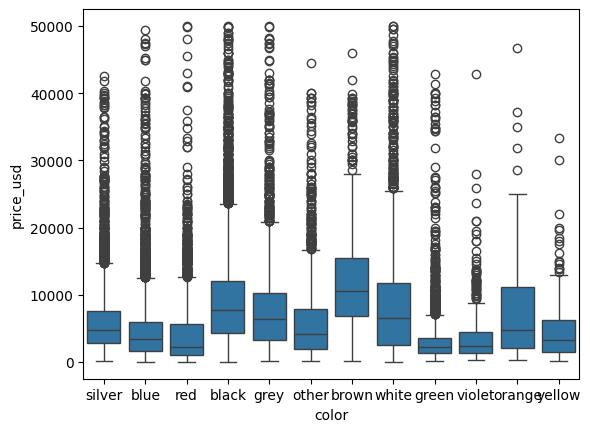

In [38]:
sns.boxplot(data, x="color", y="price_usd")

In [39]:
px.box(data, "price_usd")

In [40]:
px.box(data, "color", "price_usd", color="color")

### [Exploración visual de los datos](https://datavizproject.com)

In [41]:
iris = sns.load_dataset("iris")
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [42]:
# Scatterplot
px.scatter(iris, "sepal_length", "petal_length", color="species")

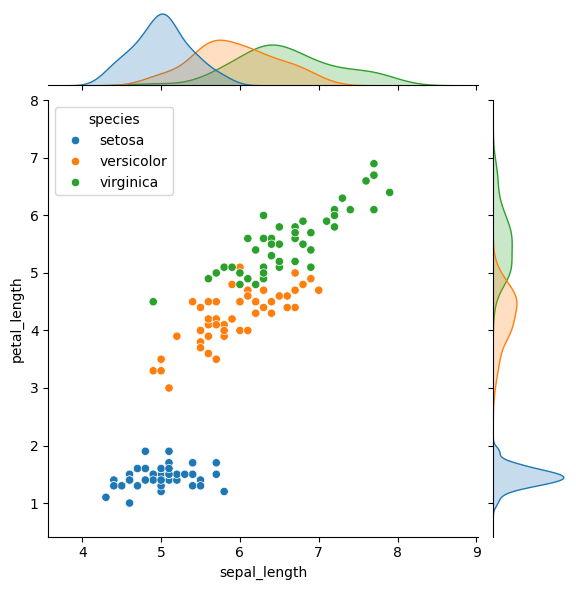

In [43]:
sns.jointplot(iris, x="sepal_length", y="petal_length", hue="species")

In [44]:
px.scatter(iris, x="sepal_length", y="petal_length", color="species", marginal_x='histogram', marginal_y='histogram')

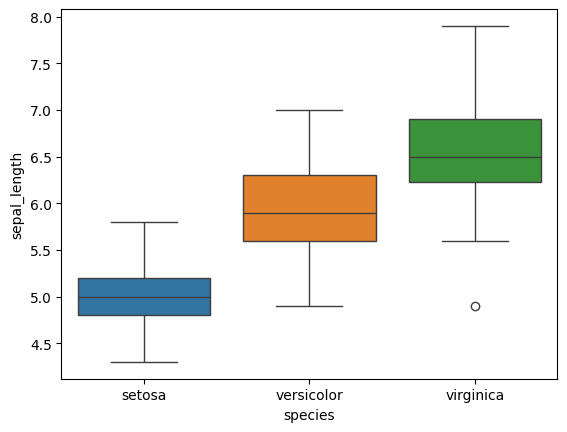

In [45]:
sns.boxplot(iris, x="species", y="sepal_length", hue="species")
plt.show()

## Estadísticos para ingesta y procesamiento

### Pipelines de procesamiento para variables numéricas

#### Escalamiento lineal (Normalización)

Los modelos de machine learning son más optimos cuando los datos están en la misma escala, para ello se normalizan los datos a un rango de $[-1, 1]$, esto se usa generalmente cuando los datos están distribuidos uniforme o simetricamente

Supongamos unos datos:

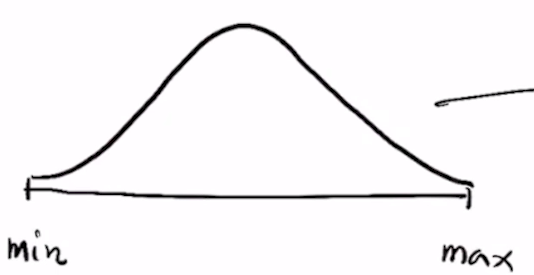

Para optimizar en ML se busca escalar los datos:

- min-max $x\overset{T}{\rightarrow}x_s$ Se busca una transformación lineal T que lleve todos los valores de $x$ al rango $[-1,1]$. Se usa para datos uniformes

$$x_s=\frac{2x-min-max}{max-min}$$

$$z=\frac{x-min}{max-min}$$

- Clipping: Corta la distribución de los datos entre dos valores limite. El valor de cada dato fuera de los limites colapsa al valor del limite mas cercano.

- Winzoriding: Usando percentiles específicos de limites.

- Z-Score: Se determina usando medidas de tendencia central y de dispersión. Se  usa para datos simetricos

$$ x_s = \frac{ x - \bar{x}}{\sigma} $$

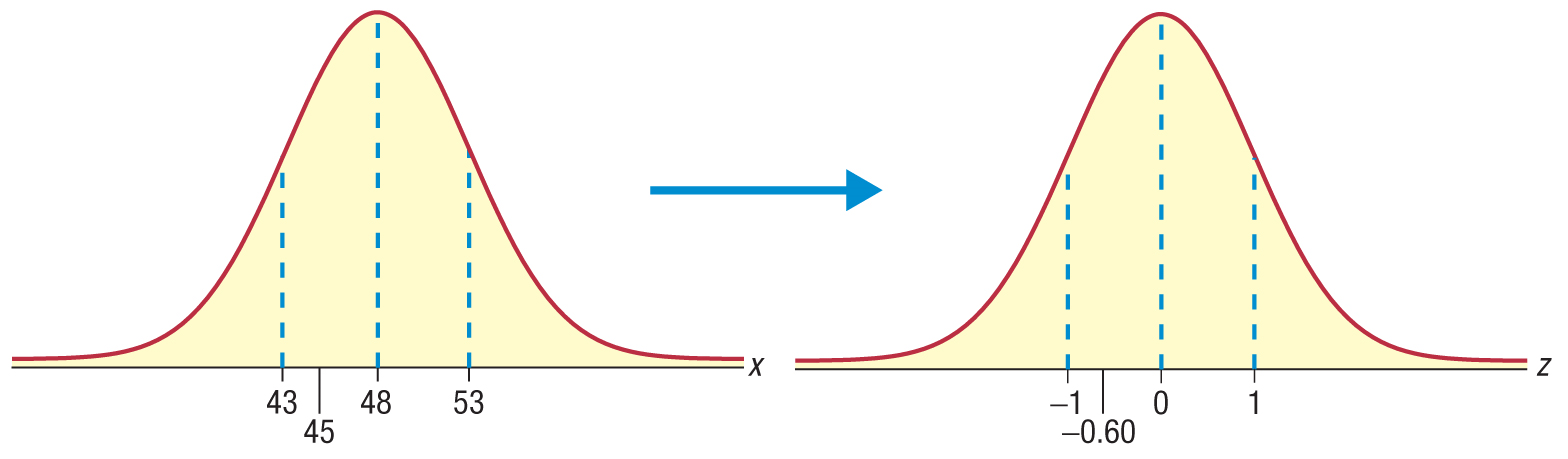

In [46]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model

In [47]:
X, y = datasets.load_diabetes(return_X_y=True)

raw = X[:, None, 2]
raw

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [48]:
max_raw = max(raw)
min_raw = min(raw)

scaled = (2*raw- max_raw - min_raw) / (max_raw - min_raw)
scaled

array([[ 0.16528926],
       [-0.70247934],
       [ 0.03305785],
       [-0.39669421],
       [-0.58677686],
       [-0.61983471],
       [-0.66942149],
       [-0.32231405],
       [ 0.16528926],
       [-0.00826446],
       [-0.95041322],
       [-0.17355372],
       [-0.52892562],
       [-0.32231405],
       [-0.50413223],
       [-0.44628099],
       [ 0.01652893],
       [-0.21487603],
       [-0.38842975],
       [-0.44628099],
       [-0.74380165],
       [-0.47933884],
       [-0.33884298],
       [ 0.15702479],
       [-0.03305785],
       [-0.40495868],
       [-0.90082645],
       [ 0.14876033],
       [-0.47107438],
       [-0.3553719 ],
       [ 0.03305785],
       [-0.80991736],
       [ 0.65289256],
       [-0.69421488],
       [-0.79338843],
       [-0.54545455],
       [-0.1322314 ],
       [-0.2231405 ],
       [ 0.23966942],
       [-0.19834711],
       [-0.37190083],
       [-0.82644628],
       [-0.38842975],
       [-0.48760331],
       [ 0.21487603],
       [-0

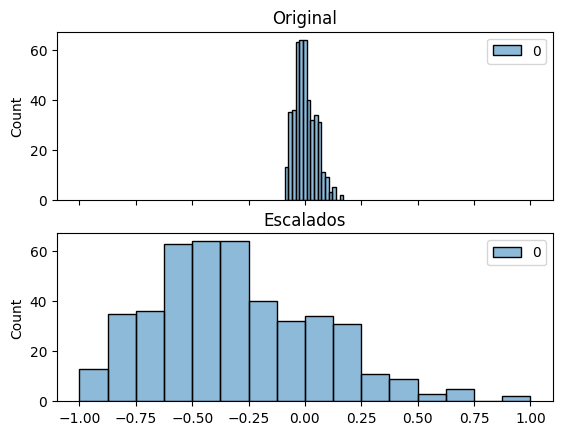

In [49]:
fig, ax = plt.subplots(2, 1, sharex=True)

sns.histplot(data=raw, ax=ax[0])
ax[0].set_title("Original")
sns.histplot(data=scaled, ax=ax[1])
ax[1].set_title("Escalados")
plt.show()

In [50]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)
    
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)   

In [51]:
print(f"Train raw time: {timeit.timeit(train_raw, number=100)}")
print(f"Train scaled time: {timeit.timeit(train_scaled, number=100)}")

Train raw time: 0.13444259999960195
Train scaled time: 0.11364299999695504


#### Escalamiento no lineal

Es usado cuando los datos no tienen una distribución simetrica, cuando están muy sesgados. Se usan ANTES del escalamiento lineal. Algunos de los más usados son:

- Logística: $$\frac{1}{1+\exp(-x)}$$

<!-- - LogNormal: $$$$ -->

- TanH: $$p(k|x;\theta)=\frac{[E(Y|x)]^ke^{-E(Y|x)}}{k!}$$


In [52]:
df = pd.read_csv("./data/cars.csv")

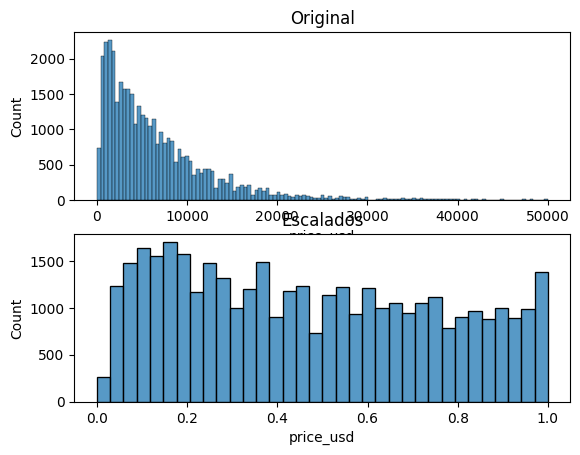

In [53]:
df_scaled = df.copy()

p = 10000

df_scaled["price_usd"] = df_scaled["price_usd"].apply(lambda x: np.tanh(x / p))

fig, ax = plt.subplots(2, 1)
ax[0].set_title("Original")
ax[1].set_title("Escalados")
sns.histplot(df, x="price_usd", ax=ax[0])
sns.histplot(df_scaled, x="price_usd", ax=ax[1])
plt.show()

### Pipelines de procesamiento para variables categóricas

| Categoría | Dummy | One-hot |
|---|---|---|
| ingles | $$[0,0]$$ | $$[1, 0, 0]$$ |
| español | $$[0,1]$$ | $$[0, 1, 0]$$ |
| frances (NaN) | $$[1,0]$$(error) | $$[0, 0, 1]$$ |


In [54]:
import pandas as pd

df = pd.read_csv("./data/cars.csv")

#### Dummy

Es la representación más compacta en la que se puede tener los datos, es buena cuando los inputs son variables linealmente independiente

In [55]:
pd.get_dummies(data=df["engine_type"])

diesel  electric  gasoline
0           0         0         1
1           0         0         1
2           0         0         1
3           0         0         1
4           0         0         1
...       ...       ...       ...
38526       0         0         1
38527       1         0         0
38528       0         0         1
38529       0         0         1
38530       0         0         1

[38531 rows x 3 columns]

#### One-hot

Permite incluir categorías que no estaban en el dataset inicialmente. De forma que si se filtra una categoría que no estaba incluida, igual se pueda representar numéricamente y no de error en el modelo. Hay errores en la notación de Pandas y los tratan como que ambos modelos son lo mismo, pero en la realidad el Dummy no se usa. Aún así, en Pandas el método es .get_dummies().

In [56]:
import sklearn.preprocessing as preprocessing

In [57]:
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")

In [58]:
encoder.fit(df[["engine_type"]].values)

OneHotEncoder(handle_unknown='ignore')

In [59]:
encoder.transform([["gasoline"],["diesel"],["aceite"]]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [60]:
encoder.fit(df[["year_produced"]].values)

OneHotEncoder(handle_unknown='ignore')

In [61]:
encoder.transform([[2016],[2009],[1800]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Correlaciones

**¿Qué es la correlación?**

La correlación es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante).

**¿Qué es la covarianza?**

Es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.

$$cov=\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})$$

**¿Qué es el coeficiente de correlación?**

El coeficiente de correlación es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación.

$$\rho=\frac{cov}{std(x)std(y)}$$

In [74]:
iris = sns.load_dataset("iris")

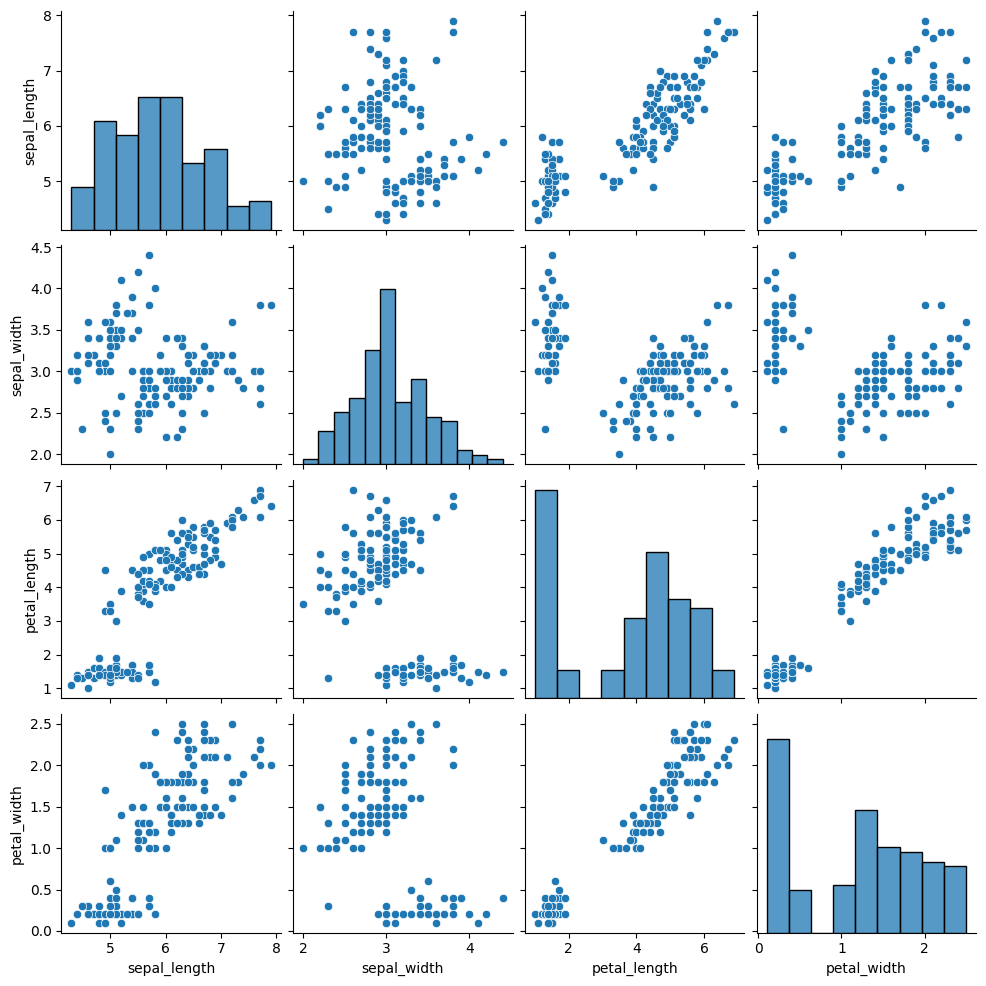

In [75]:
sns.pairplot(iris)

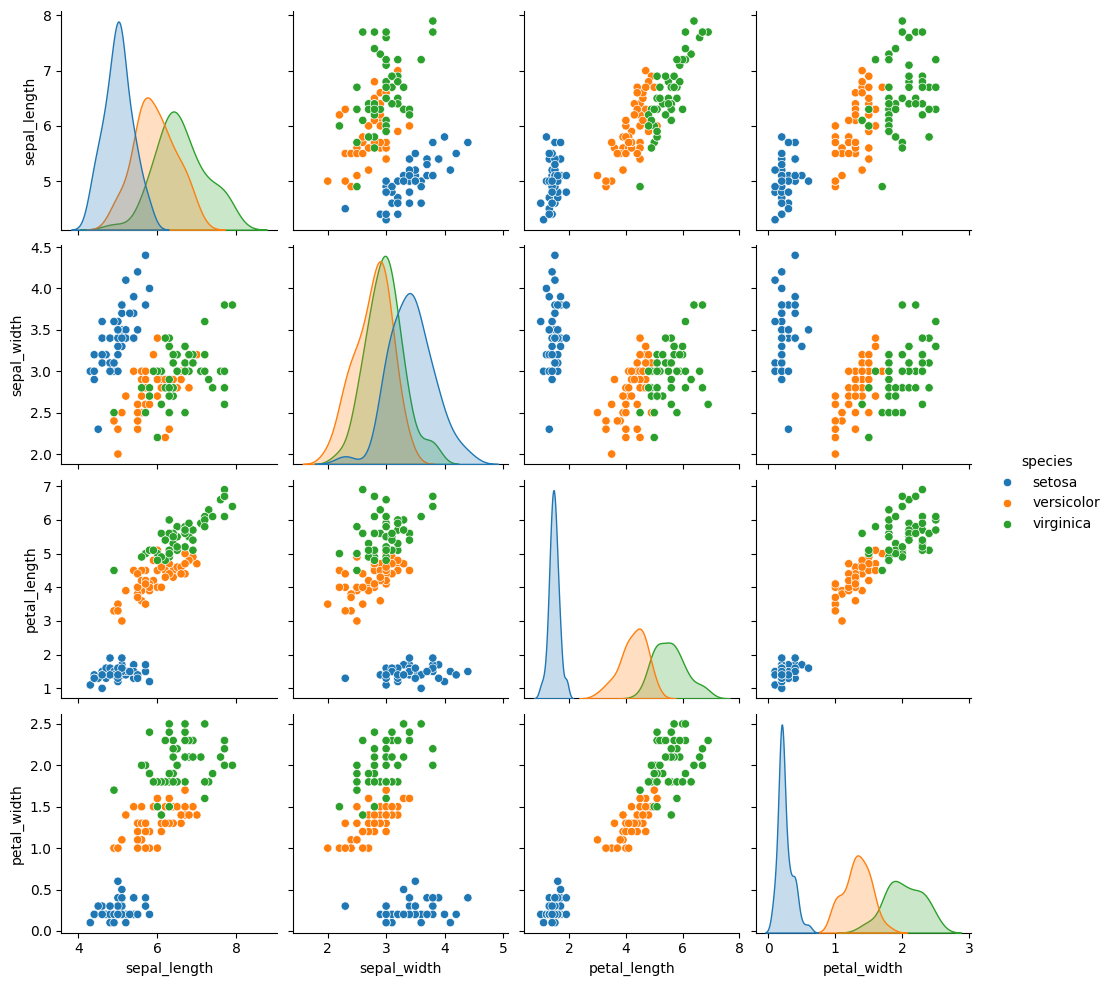

In [76]:
sns.pairplot(iris, hue="species")

C:\Users\shani\AppData\Local\Temp\ipykernel_6412\4216726391.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

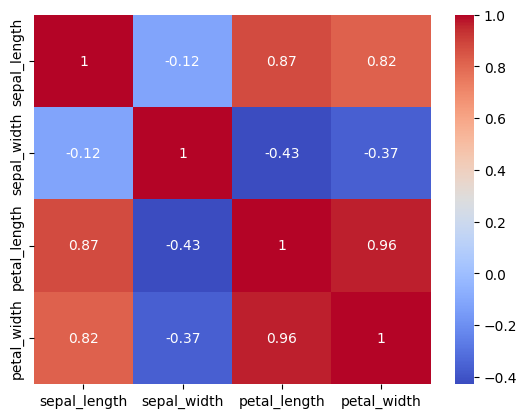

In [77]:
sns.heatmap(iris.corr(), annot=True, cmap="coolwarm")

In [78]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [81]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

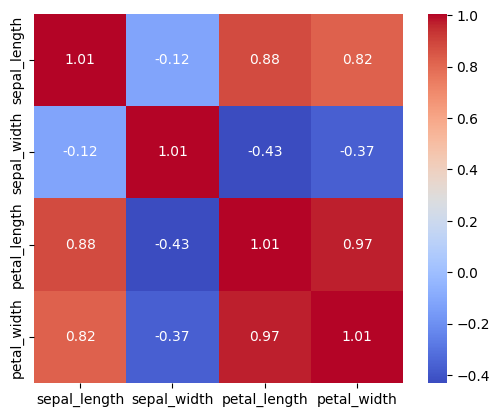

In [89]:
hm = sns.heatmap(covariance_matrix, 
                 annot=True,
                 cbar=True,
                 square=True,
                 fmt=".2f",
                 cmap="coolwarm",
                 annot_kws={"size":12},
                 xticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                 yticklabels=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

## Proyecto de aplicación

### PCA: Analisis de componentes principales

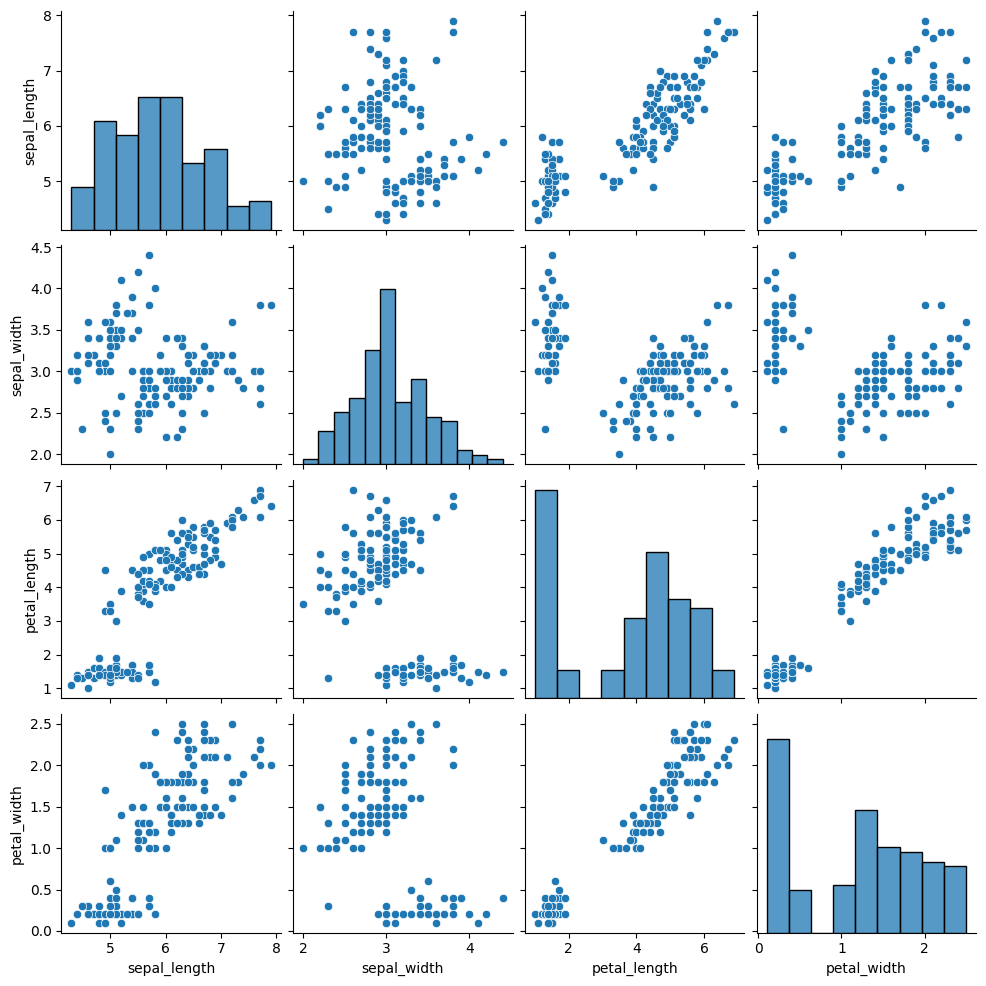

In [91]:
sns.pairplot(iris)

ValueError: Per-column arrays must each be 1-dimensional

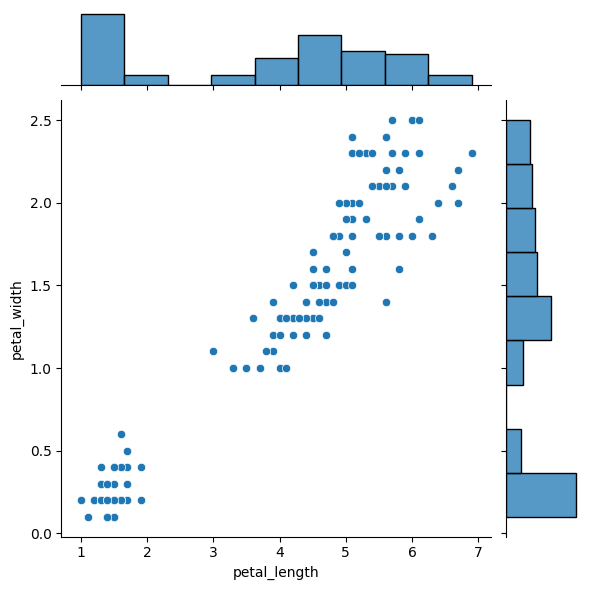

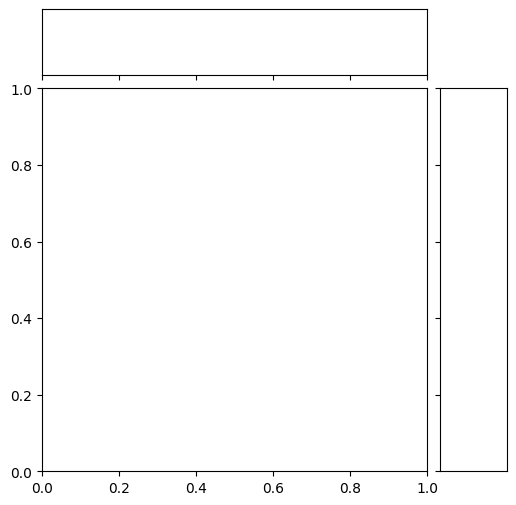

In [92]:
sns.jointplot(data = iris, x = "petal_length", y = "petal_width")
sns.jointplot( x = scaled[:,2], y = scaled[:3])